In [1]:
import sympy as s
import numpy as np
import matplotlib.pyplot as plt

In [26]:
n = s.symbols('n', integer=True, positive=True)

In [27]:
t,d = s.symbols('t d', real=True)

In [28]:
a_n = 1/s.pi*s.integrate(s.cos(n*t), (t, 0, d*s.pi))
a_n

sin(pi*d*n)/(pi*n)

In [30]:
b_n = s.simplify(1/s.pi*s.integrate(s.sin(n*t), (t, 0, d*s.pi)))
b_n

(1 - cos(pi*d*n))/(pi*n)

In [31]:
a_n.subs(d,1)

0

In [32]:
b_n.subs(d,1)

(1 - (-1)**n)/(pi*n)

In [33]:
e1 = a_n
e1

sin(pi*d*n)/(pi*n)

In [34]:
e2 = b_n
e2

(1 - cos(pi*d*n))/(pi*n)

In [35]:
d,n

(d, n)

In [36]:
an = s.lambdify([d,n],e1)

In [37]:
bn = s.lambdify([d,n], e2)

Text(0.5, 1.0, 'Fourier Sum')

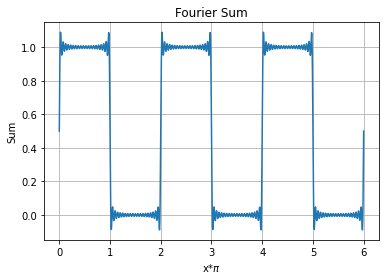

In [87]:
fig, ax = plt.subplots()
x = np.linspace(0,6*np.pi,1000 )
# a0 = d so the first term of the Fourier Series is a0/2
d = 1
y = np.ones(1000)*d/2

for n in np.arange(1,40):
    y += an(d, n)*np.cos(n*x)+bn(d,n)*np.sin(n*x)
    
xpi = x/np.pi
ax.plot(xpi,y)
ax.grid()
ax.set_xlabel("x*$\pi$")
ax.set_ylabel("Sum")
ax.set_title("Fourier Sum")

In [60]:
from matplotlib.ticker import MaxNLocator

Text(0.5, 1.0, 'Harmonic Decomposition')

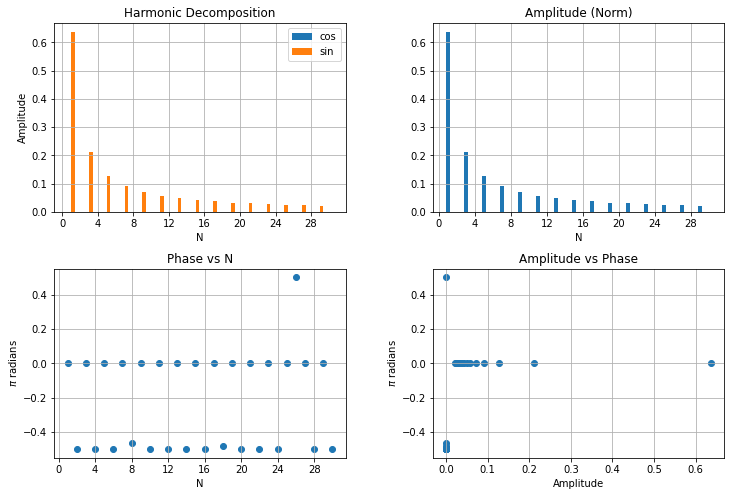

In [88]:
fig, ((ax, ax2), (ax3, ax4)) = plt.subplots(2,2,  figsize=(12,8))
plt.subplots_adjust(wspace=0.3, hspace=0.3)
d = 1
n = np.arange(1,31)
y = np.array((np.vectorize(an)(d,n),np.vectorize(bn)(d,n)))
dk = np.sqrt(y[0]**2 +y[1]**2)    
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.bar(n-0.2,y[0], width=0.4, label='cos')
ax.bar(n+0.2,y[1], width=0.4, label='sin')


ax2.bar(n,dk, width=0.4, label='norm')
ax2.grid()
ax2.xaxis.set_major_locator(MaxNLocator(integer=True))
ax2.set_title("Amplitude (Norm)")
ax2.set_xlabel("N")

phase = np.arctan2(y[0],y[1])/np.pi
ax3.scatter(n, phase)
ax3.set_title("Phase vs N")
ax3.set_xlabel("N")
ax3.set_ylabel("$\pi$ radians")
ax3.grid()
ax3.xaxis.set_major_locator(MaxNLocator(integer=True))

ax4.scatter(dk, phase)
ax4.set_title("Amplitude vs Phase")
ax4.grid()
ax4.set_ylabel("$\pi$ radians")
ax4.set_xlabel("Amplitude")

ax.grid()
ax.legend()

ax.set_xlabel("N")
ax.set_ylabel("Amplitude")
ax.set_title("Harmonic Decomposition")

